In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



595

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tacoronte
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | effingham
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | klaksvik
Processing Record 13 of Set 1 | storslett
Processing Record 14 of Set 1 | isangel
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Se

Processing Record 38 of Set 4 | manokwari
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | cabedelo
Processing Record 41 of Set 4 | mococa
Processing Record 42 of Set 4 | niquelandia
Processing Record 43 of Set 4 | ayan
Processing Record 44 of Set 4 | snezhnogorsk
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | sarahan
Processing Record 48 of Set 4 | pangody
Processing Record 49 of Set 4 | puerto escondido
Processing Record 50 of Set 4 | toliary
City not found. Skipping...
Processing Record 1 of Set 5 | raahe
Processing Record 2 of Set 5 | kutum
Processing Record 3 of Set 5 | carthage
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | boyabat
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | jimenez
Processing Record 9 of Set 5 | lydenburg
Processing Record 10 of Set 5 | umm lajj
Processing Record 11 of Set 5 | rob

Processing Record 29 of Set 8 | gaoual
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | marystown
Processing Record 33 of Set 8 | longlac
City not found. Skipping...
Processing Record 34 of Set 8 | saint-avertin
Processing Record 35 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 36 of Set 8 | kirzhach
Processing Record 37 of Set 8 | paranaiba
Processing Record 38 of Set 8 | keti bandar
Processing Record 39 of Set 8 | chulman
Processing Record 40 of Set 8 | brufut
Processing Record 41 of Set 8 | yatou
Processing Record 42 of Set 8 | high level
Processing Record 43 of Set 8 | bilma
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | kampot
Processing Record 46 of Set 8 | arcata
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | fort saint james
Processing Record 49 of Set 8 | whitehorse
Processing Record 50 of Set 8 | raudeberg
Processing Record 1 of Set 9 | gre

Processing Record 17 of Set 12 | san ignacio
Processing Record 18 of Set 12 | mujiayingzi
Processing Record 19 of Set 12 | jiblah
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | scottsbluff
Processing Record 22 of Set 12 | ilhabela
Processing Record 23 of Set 12 | toora-khem
Processing Record 24 of Set 12 | san anselmo
Processing Record 25 of Set 12 | antsohihy
Processing Record 26 of Set 12 | da nang
Processing Record 27 of Set 12 | andahuaylas
Processing Record 28 of Set 12 | beloha
Processing Record 29 of Set 12 | yanan
City not found. Skipping...
Processing Record 30 of Set 12 | burley
Processing Record 31 of Set 12 | griffith
Processing Record 32 of Set 12 | nicoya
Processing Record 33 of Set 12 | bobo dioulasso
Processing Record 34 of Set 12 | melbu
Processing Record 35 of Set 12 | nador
Processing Record 36 of Set 12 | ugoofaaru
Processing Record 37 of Set 12 | bara
Processing Record 38 of Set 12 | taltal
Processing Record 39 of Set 12 | zhezkazgan
Proc

In [10]:
len(city_data)

550

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tacoronte,28.4769,-16.4102,73.72,72,20,13.00,ES,2021-10-06 14:10:55
1,Airai,-8.9266,125.4092,61.63,91,80,1.70,TL,2021-10-06 14:10:56
2,Ushuaia,-54.8000,-68.3000,46.06,66,40,8.05,AR,2021-10-06 14:10:32
3,Leningradskiy,69.3833,178.4167,28.00,97,100,9.35,RU,2021-10-06 14:10:56
4,Effingham,32.3669,-81.3332,78.84,98,100,5.19,US,2021-10-06 14:10:56
5,Bluff,-46.6000,168.3333,52.81,93,19,0.27,NZ,2021-10-06 14:10:57
6,Barrow,71.2906,-156.7887,30.22,86,90,12.66,US,2021-10-06 14:10:57
7,Puerto Ayora,-0.7393,-90.3518,68.56,95,96,7.00,EC,2021-10-06 14:10:57
8,Clyde River,70.4692,-68.5914,33.51,99,100,8.99,CA,2021-10-06 14:10:57
9,Klaksvik,62.2266,-6.5890,47.32,77,88,11.36,FO,2021-10-06 14:10:58


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tacoronte,ES,2021-10-06 14:10:55,28.4769,-16.4102,73.72,72,20,13.00
1,Airai,TL,2021-10-06 14:10:56,-8.9266,125.4092,61.63,91,80,1.70
2,Ushuaia,AR,2021-10-06 14:10:32,-54.8000,-68.3000,46.06,66,40,8.05
3,Leningradskiy,RU,2021-10-06 14:10:56,69.3833,178.4167,28.00,97,100,9.35
4,Effingham,US,2021-10-06 14:10:56,32.3669,-81.3332,78.84,98,100,5.19


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

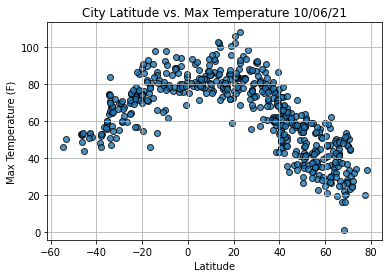

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

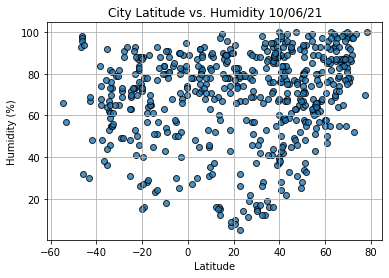

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

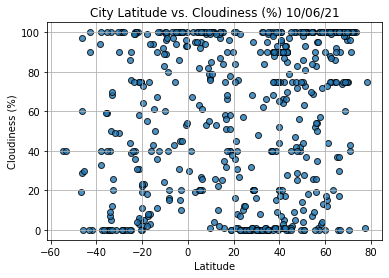

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

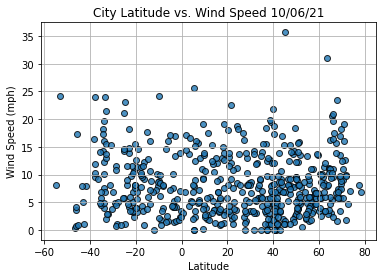

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()